# Business Application of Sentiment Analysis
## A. Definition of the method
###  1. Sentiment Analysis
#### Sentiment analysis is a natural language processing technique used to identify and extract subjective information from text data. The process involves analyzing the text's emotional tone, whether positive, negative, or neutral, and evaluating its impact on the overall message's meaning.
### 2. Libraries used in Sentiment Analysis
#### Tweepy :
#### Tweepy is a Python library that provides a simple and convenient way to access the Twitter API. While Tweepy does not have built-in sentiment analysis capabilities, you can use it to retrieve tweets based on a specific query and then use a separate sentiment analysis library to analyze the sentiment of those tweets.
#### WordCloud : 
#### Word cloud is a popular technique used in sentiment analysis to visually represent the most frequently used words in a given set of text data. It is a graphical representation of the text data, where the size of each word represents its frequency or importance in the given text.
#### TextBlob :
#### TextBlob is a Python library that makes it easy to perform sentiment analysis on text data. It provides a simple API for analyzing the sentiment of a piece of text, returning a polarity score that ranges from -1 (negative sentiment) to 1 (positive sentiment).
## B. Introduction
#### A suitable business application of sentiment analysis is in the field of customer feedback analysis. In our case, it is US Bank. Banks can gather customer feedback through various channels, such as surveys, social media, and online reviews, to improve their products or services. However, manually reading and analyzing large amounts of customer feedback can be challenging and time-consuming. Hence, sentiment analysis can help businesses automate the process of customer feedback analysis and get actionable insights quickly.
## C. Analysis
#### To perform sentiment analysis, we can use libraries, tweepy, wordCloud, textBlob that can classify text as positive, negative, or neutral based on its sentiment. Also these can be used to plot different graphs for visual representation of sentiment analysis as piecharts, word clouds.
## D. Sample Data Explanation
#### In our case, we choose datasource from twitter. The datasource contains tweets retrrieved from twitter PAI with "US Bank" as search criteria. These tweets contains the customer's review text, and some some python operations are performed to classify the tweets as positive, negative, or neutral.

In [21]:
# Install Libraries
!pip install textblob
!pip install tweepy
!pip install pycountry
!pip install wordcloud
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


In [22]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# Step 2: Authentication for Twitter API

In [23]:
# Authentication
consumerKey = "2CJbp8m7Rg26LtZEKAeVXWceG"
consumerSecret = "IbULWKlS0uvhLnMTcFkzvMjDfZUcBM6eVbdLYMUbNafhieX8Y6"
accessToken = "1119095264961126402-8QDK0FvTjGmV7w1hUtGsTyCyH77bNE"
accessTokenSecret = "unheMaBnZsHrcBt3mK1bE8Ib4wtE3tPtAwSA65Y0zWIK0"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

# Step 3: Getting Tweets With Keyword or Hashtag

In [24]:
#Sentiment Analysis
def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = "US Bank"
noOfTweet = 100

tweets = tweepy.Cursor(api.search_tweets, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    # print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')
 


In [25]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  100
positive number:  47
negative number:  37
neutral number:  16


In [26]:
tweet_list[0:20]

,0
0,RT @RadarHits: 🇺🇸‼️ US Dollar global dominance...
1,Saturday (King Charles III Coronation Day) wea...
2,RT @DanKEberhart: Joe Biden has now presided o...
3,@RealChiefPriest #TheNancyIsimeShow\nThank you...
4,RT @FoxNews: Biden has presided over three of ...
5,RT @FoxNews: Biden has presided over three of ...
6,RT @FoxNews: Biden has presided over three of ...
7,RT @AfDB_Group: How can multilateral developme...
8,"Louisville, Kentucky shooting: Police release ..."
9,It’s giving BANK HOLIDAY!!! 🎉🎊 \n\nKick your b...


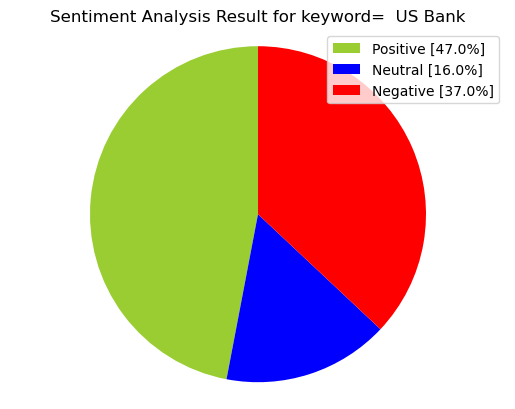

In [27]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [28]:
tweet_list.drop_duplicates(inplace = True)

# Extracting text values

In [29]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,RT @RadarHits: 🇺🇸‼️ US Dollar global dominance...,RT @RadarHits: 🇺🇸‼️ US Dollar global dominance...
1,Saturday (King Charles III Coronation Day) wea...,Saturday (King Charles III Coronation Day) wea...
2,RT @DanKEberhart: Joe Biden has now presided o...,RT @DanKEberhart: Joe Biden has now presided o...
3,@RealChiefPriest #TheNancyIsimeShow\nThank you...,@RealChiefPriest #TheNancyIsimeShow\nThank you...
4,RT @FoxNews: Biden has presided over three of ...,RT @FoxNews: Biden has presided over three of ...
...,...,...
92,RT @AlexH_Johnson: If you capitalize on fears ...,RT @AlexH_Johnson: If you capitalize on fears ...
94,"@laurenboebert Oh BOBO, I Think You Have SO Ma...","@laurenboebert Oh BOBO, I Think You Have SO Ma..."
97,https://t.co/OIkGOqz6p4 DOJ investigation!,https://t.co/OIkGOqz6p4 DOJ investigation!
98,Us waiting for the usual Lakes bank holiday we...,Us waiting for the usual Lakes bank holiday we...


In [30]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,RT @RadarHits: 🇺🇸‼️ US Dollar global dominance...,us dollar global dominance is not under ...
1,Saturday (King Charles III Coronation Day) wea...,saturday king charles iii coronation day wea...
2,RT @DanKEberhart: Joe Biden has now presided o...,joe biden has now presided over three of the ...
3,@RealChiefPriest #TheNancyIsimeShow\nThank you...,thenancyisimeshow thank you sir may almight...
4,RT @FoxNews: Biden has presided over three of ...,biden has presided over three of four worst b...
7,RT @AfDB_Group: How can multilateral developme...,how can multilateral development banks work t...
8,"Louisville, Kentucky shooting: Police release ...",louisville kentucky shooting police release ...
9,It’s giving BANK HOLIDAY!!! 🎉🎊 \n\nKick your b...,it s giving bank holiday kick your big...
10,RT @Kellybonito_: This is what we are talking ...,this is what we are talking about davido s i...
11,"RT @EliteAlgo: US stock market: S&amp;P 500, D...",us stock market s amp p 500 dow end down as...


In [31]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

/tmp/ipykernel_11943/4219357815.py:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, row in tw_list['text'].iteritems():


,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @RadarHits: 🇺🇸‼️ US Dollar global dominance...,us dollar global dominance is not under ...,0.000000,0.000000,positive,0.000,0.806,0.194,0.5538
1,Saturday (King Charles III Coronation Day) wea...,saturday king charles iii coronation day wea...,-0.050000,0.400000,neutral,0.000,1.000,0.000,0.0000
2,RT @DanKEberhart: Joe Biden has now presided o...,joe biden has now presided over three of the ...,0.000000,0.000000,negative,0.130,0.870,0.000,-0.4588
3,@RealChiefPriest #TheNancyIsimeShow\nThank you...,thenancyisimeshow thank you sir may almight...,1.000000,0.300000,positive,0.000,0.528,0.472,0.8910
4,RT @FoxNews: Biden has presided over three of ...,biden has presided over three of four worst b...,-1.000000,1.000000,negative,0.392,0.608,0.000,-0.7964
7,RT @AfDB_Group: How can multilateral developme...,how can multilateral development banks work t...,0.250000,0.600000,positive,0.000,0.893,0.107,0.2023
8,"Louisville, Kentucky shooting: Police release ...",louisville kentucky shooting police release ...,0.136364,0.454545,neutral,0.000,1.000,0.000,0.0000
9,It’s giving BANK HOLIDAY!!! 🎉🎊 \n\nKick your b...,it s giving bank holiday kick your big...,0.000000,0.100000,positive,0.000,0.642,0.358,0.7783
10,RT @Kellybonito_: This is what we are talking ...,this is what we are talking about davido s i...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
11,"RT @EliteAlgo: US stock market: S&amp;P 500, D...",us stock market s amp p 500 dow end down as...,-0.155556,0.288889,negative,0.301,0.699,0.000,-0.7845


In [32]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [33]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [34]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
positive,35,53.85
negative,16,24.62
neutral,14,21.54


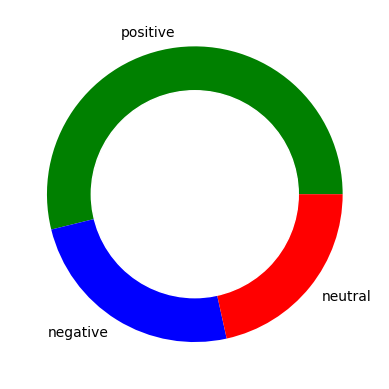

In [35]:
# create data for Pie Chart
pc = count_values_in_column(tw_list,"sentiment")
names= pc.index
size=pc["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [36]:
#Function to Create Wordcloud

def create_wordcloud(text):
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white", width=600, height=400,               
                  max_words=300,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    
    plt.imshow(wc)
    plt.show()



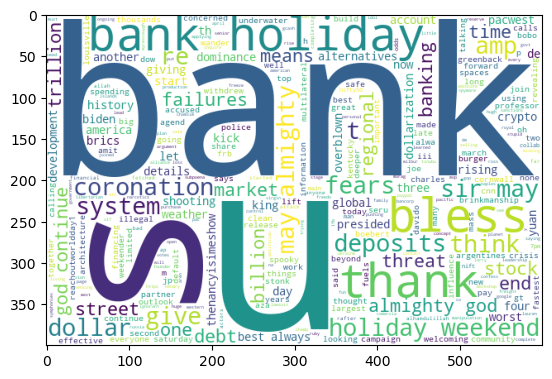

In [37]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

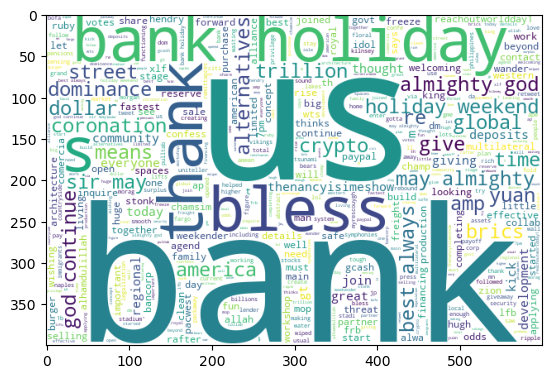

In [38]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

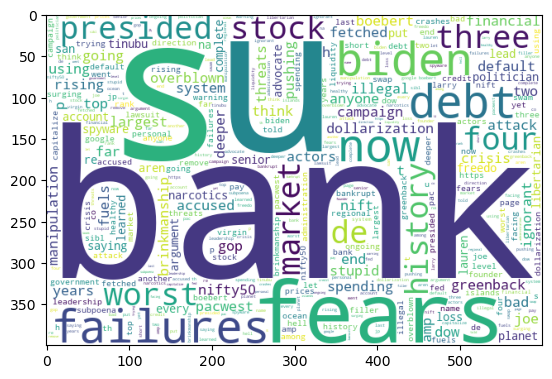

In [39]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

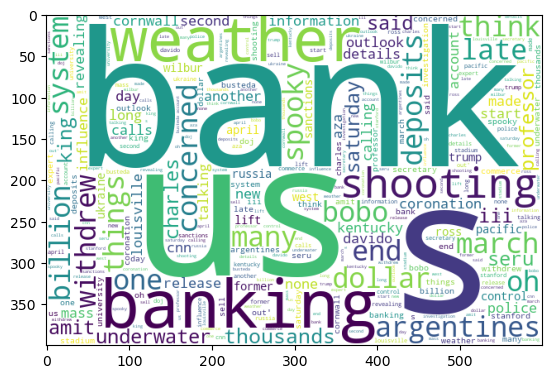

In [40]:
#Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral["text"].values)